In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("car_details.csv")

In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:
df = df.dropna()


In [12]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [13]:
df["owner"] = df["owner"].str.replace("First Owner", "1")
df["owner"] = df["owner"].str.replace("Second Owner", "2")
df["owner"] = df["owner"].str.replace("Third Owner", "3")
df["owner"] = df["owner"].str.replace("Fourth & Above Owner", "4")
df["owner"] = df["owner"].str.replace("Test Drive Car", "0")

In [14]:
df["mileage"] = df["mileage"].str.replace("kmpl", "")
df["mileage"] = df["mileage"].str.replace("km/kg", "")
df["engine"] = df["engine"].str.replace("CC", "")
df["max_power"] = df["max_power"].str.replace("bhp", "")

In [15]:
df["owner"] = df["owner"].astype("int")
df["mileage"] = df["mileage"].astype("double")
df["engine"] = df["engine"].astype("double")

In [16]:
df["max_power"] = df["max_power"].astype("object")

In [17]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int32
mileage          float64
engine           float64
max_power         object
torque            object
seats            float64
dtype: object

In [18]:
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [19]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

In [20]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int32
mileage          float64
engine           float64
max_power         object
torque            object
seats            float64
dtype: object

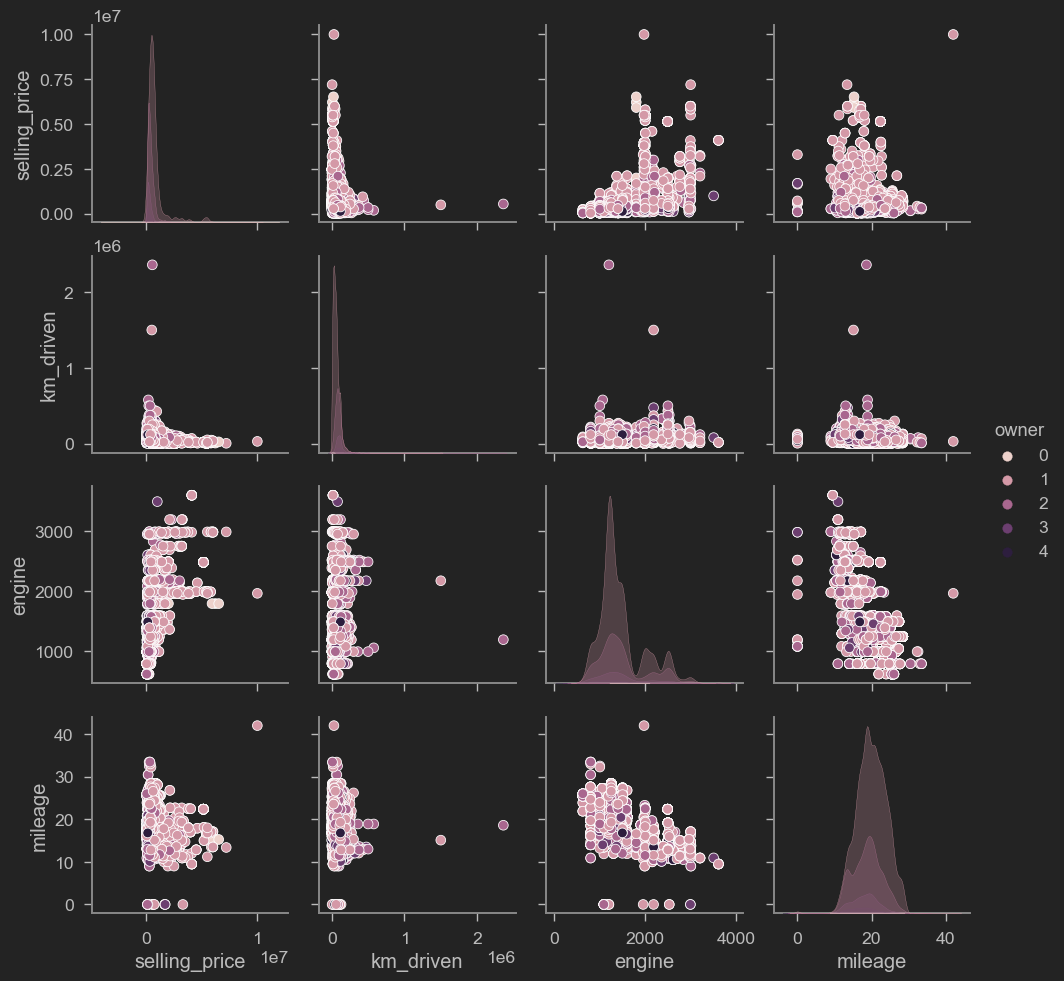

In [15]:
sns.pairplot(df[["selling_price","km_driven","engine","mileage","owner"]],hue="owner")

In [16]:

df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12860\3683255628.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,year,selling_price,km_driven,owner,mileage,engine,seats
year,1.000000,0.412302,-0.428548,-0.508848,0.328544,0.018263,-0.007923
selling_price,0.412302,1.000000,-0.222158,-0.238622,-0.126280,0.455682,0.041617
km_driven,-0.428548,-0.222158,1.000000,0.287359,-0.172980,0.206031,0.227259
owner,-0.508848,-0.238622,0.287359,1.000000,-0.173244,0.005199,0.029517
mileage,0.328544,-0.126280,-0.172980,-0.173244,1.000000,-0.576408,-0.451700
engine,0.018263,0.455682,0.206031,0.005199,-0.576408,1.000000,0.611103
seats,-0.007923,0.041617,0.227259,0.029517,-0.451700,0.611103,1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_12860\873084995.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

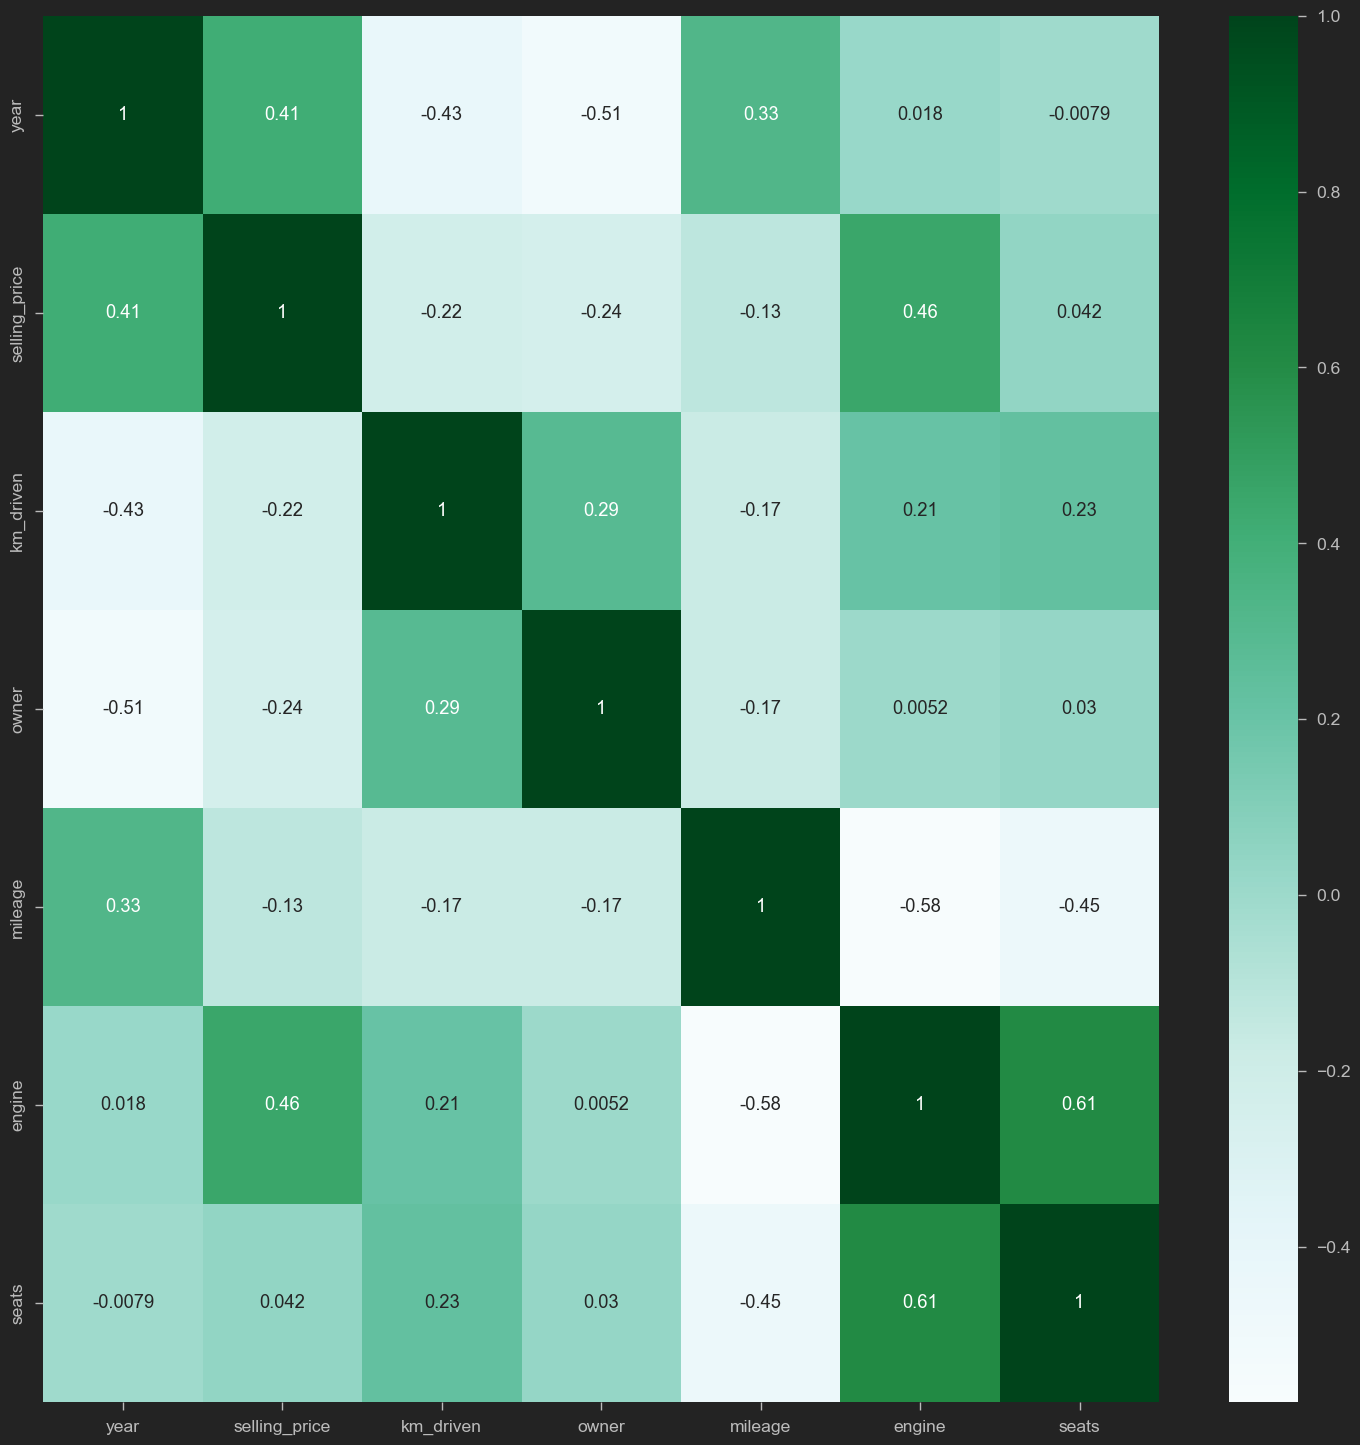

In [17]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cmap= "BuGn", annot=True)

In [18]:
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [19]:
df.dtypes


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int32
mileage          float64
engine           float64
max_power         object
torque            object
seats            float64
dtype: object

In [20]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [21]:
df_new = pd.get_dummies(df, columns= ['name', 'fuel', 'seller_type', 'transmission', 'max_power','torque'])

In [22]:
df_new.head()

,year,selling_price,km_driven,owner,mileage,engine,seats,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,...,torque_96.1Nm@ 3000rpm,torque_96Nm@ 2500rpm,torque_96Nm@ 3000rpm,torque_96Nm@ 3500rpm,torque_98Nm@ 1600-3000rpm,torque_99.04Nm@ 4500rpm,torque_99.07Nm@ 4500rpm,torque_99.1Nm@ 4500rpm,torque_99.8Nm@ 2700rpm,torque_99Nm@ 4500rpm
0,2014,450000,145500,1,23.40,1248.0,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,2,21.14,1498.0,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2006,158000,140000,3,17.70,1497.0,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,1,23.00,1396.0,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,1,16.10,1298.0,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X = df_new.drop("selling_price", axis=1)
y = df_new["selling_price"]

In [24]:
X

,year,km_driven,owner,mileage,engine,seats,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,...,torque_96.1Nm@ 3000rpm,torque_96Nm@ 2500rpm,torque_96Nm@ 3000rpm,torque_96Nm@ 3500rpm,torque_98Nm@ 1600-3000rpm,torque_99.04Nm@ 4500rpm,torque_99.07Nm@ 4500rpm,torque_99.1Nm@ 4500rpm,torque_99.8Nm@ 2700rpm,torque_99Nm@ 4500rpm
0,2014,145500,1,23.40,1248.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,120000,2,21.14,1498.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2006,140000,3,17.70,1497.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,127000,1,23.00,1396.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,120000,1,16.10,1298.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,1,18.50,1197.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,2007,119000,4,16.80,1493.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,2009,120000,1,19.30,1248.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,2013,25000,1,23.57,1396.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=2)

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
df_new1 = df_new.dropna()


In [30]:
X = df_new1.drop("selling_price", axis=1)
y = df_new["selling_price"]

In [31]:
X = np.array(X)
y= np.array(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=2)

In [33]:
X = np.array(X)
y= np.array(y)

In [34]:
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
random_model.score(X_test, y_test)

0.9532026756803715

In [67]:
from xgboost import XGBRegressor

In [68]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.9403435147330567

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.9250624302486585

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)
dec_model.score(X_test, y_test)

0.9290565859463301

In [35]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
y_predR = random_model.predict(X_test)
print(y_predR)

[ 124810.26  3794429.86   214690.    ...  206599.99   184731.49
  393369.985]


In [38]:
rms = mean_squared_error(y_test, y_predR, squared=False)
print(rms)

178574.87886961125


In [39]:
from yellowbrick.regressor import ResidualsPlot

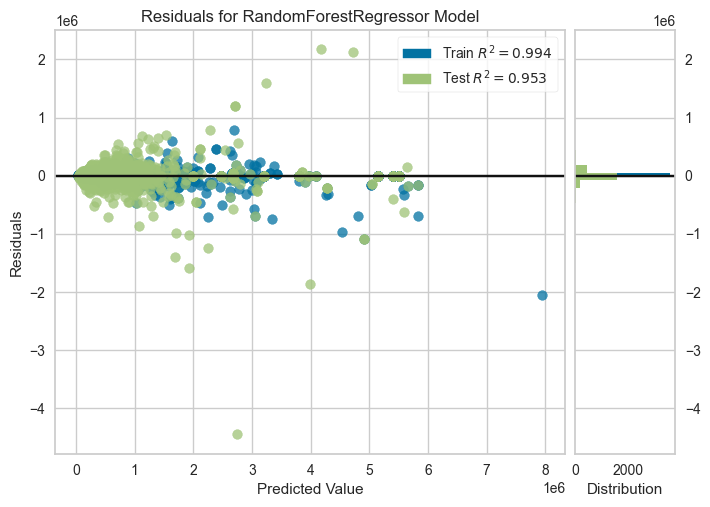

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
visualizer = ResidualsPlot(random_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

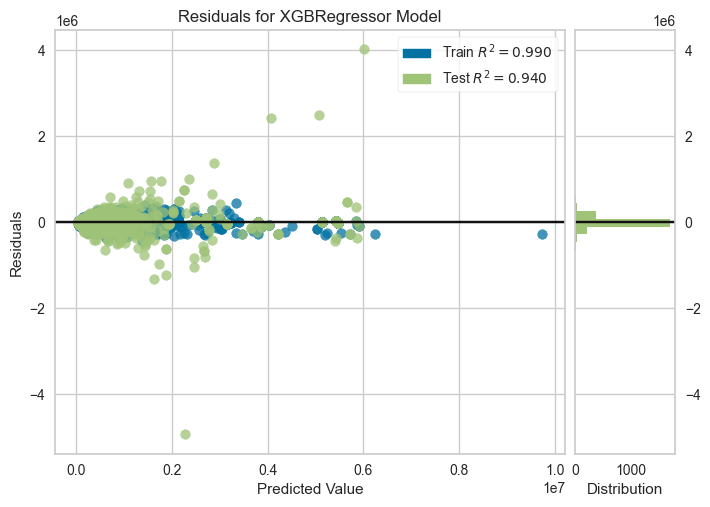

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [41]:
visualizer = ResidualsPlot(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

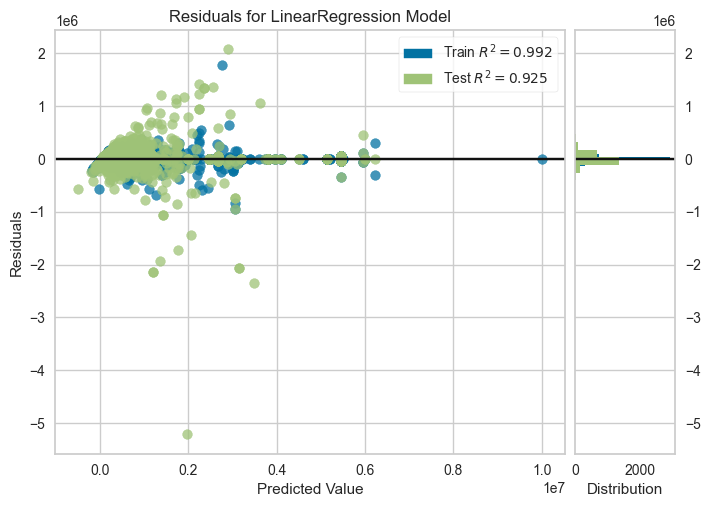

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
visualizer = ResidualsPlot(linear_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

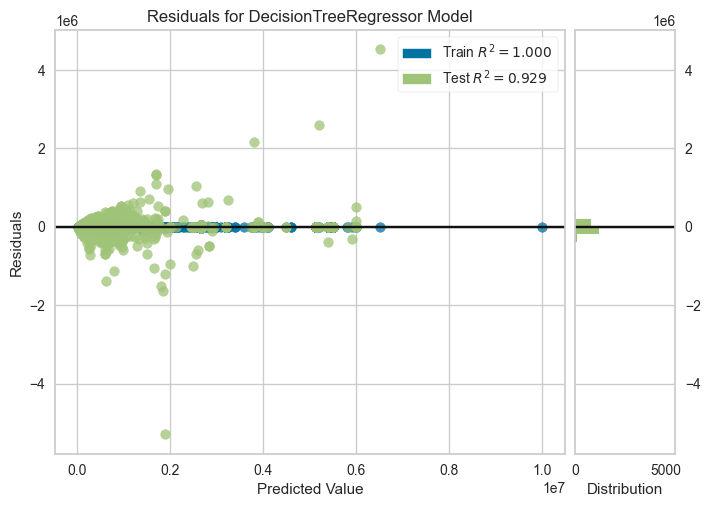

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
visualizer = ResidualsPlot(dec_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()